<a href="https://colab.research.google.com/github/Aniket7773/Minimization-Of-Energy-Consumption-in-BlockChain-Technology/blob/main/DL%2BBLOCKCHAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow transformers web3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 761.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.1
    Uninstalling websockets-14.1:
      Successfully uninstalled websockets-14.1


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load a pretrained model (e.g., MobileNetV2)
model = tf.keras.applications.MobileNetV2(weights='imagenet')

def verify_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    preds = model.predict(img_array)
    decoded_preds = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=1)[0][0]

    # Simple check: if the prediction corresponds to an expected object
    # Access the confidence score (index 2 of the tuple) instead of the class name (index 1)
    if decoded_preds[2] > 0.5:  # confidence threshold
        return True, decoded_preds[2]
    return False, decoded_preds[2]

# # Example usage
is_valid, confidence = verify_image('image_of_solar_farm.jpg')
print(f"Image Validity: {is_valid}, Confidence: {confidence}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image Validity: False, Confidence: 0.10487207025289536


In [22]:
import random
import hashlib

# Energy tracker class
class EnergyTracker:
    def __init__(self):
        self.consumption = 0

    def add_energy(self, units):
        self.consumption += units

    def reset_energy(self):
        self.consumption = 0

    def get_consumption(self):
        return self.consumption


# Blockchain class with PoW, PoS, and PoA mechanisms
class BlockchainWithPoWPoS:
    def __init__(self):
        self.chain = []
        self.pending_transactions = []
        self.pow_energy_tracker = EnergyTracker()  # Tracker for PoW
        self.pos_energy_tracker = EnergyTracker()  # Tracker for PoS
        self.poa_energy_tracker = EnergyTracker()  # Tracker for PoA

    def create_block(self, miner, proof, consensus_type):
        block = {
            'index': len(self.chain) + 1,
            'transactions': self.pending_transactions,
            'proof': proof,
            'miner': miner,
            'consensus_type': consensus_type,
        }
        self.pending_transactions = []  # Clear pending transactions
        self.chain.append(block)

    def add_transaction(self, miner, data):
        transaction = {'miner': miner, 'data': data}
        self.pending_transactions.append(transaction)

    def proof_of_work(self, difficulty):
        nonce = 0
        while True:
            guess = f"{nonce}".encode()
            hash_value = hashlib.sha256(guess).hexdigest()
            # Simulate energy consumption for each hash attempt
            self.pow_energy_tracker.add_energy(1)  # 1 unit of energy per hash attempt
            if hash_value[:difficulty] == "0" * difficulty:
                return nonce
            nonce += 1

    def proof_of_stake(self, stakes):
        # Simulate a more energy-intensive PoS process
        total_stake = sum(stakes.values())
        winner = random.choices(list(stakes.keys()), weights=list(stakes.values()), k=1)[0]

        # Iterative hashing to simulate computational intensity
        for stake in stakes.values():
            for _ in range(stake):  # Simulate validation proportional to stake size
                self.pos_energy_tracker.add_energy(2)  # 2 units per validation
                dummy_hash = hashlib.sha256(f"{random.random()}".encode()).hexdigest()

        return winner


# Initialize blockchain
blockchain = BlockchainWithPoWPoS()

# Simulated miners and their stakes
miners = ["Miner1", "Miner2", "Miner3"]
stakes = {"Miner1": 50, "Miner2": 30, "Miner3": 20}  # Proportional stakes
difficulty = 3  # Difficulty level for PoW

# PoW simulation
print("Performing Proof of Work...")
proof = blockchain.proof_of_work(difficulty)
blockchain.add_transaction("Miner1", "PoW transaction data")
blockchain.create_block(miner="Miner1", proof=proof, consensus_type="PoW")
pow_energy = blockchain.pow_energy_tracker.get_consumption()
print(f"Proof of Work completed. Proof: {proof}")
print(f"PoW Energy Consumption: {pow_energy} units")

# PoS simulation
print("\nPerforming Proof of Stake...")
selected_miner = blockchain.proof_of_stake(stakes)
blockchain.add_transaction(selected_miner, "PoS transaction data")
blockchain.create_block(miner=selected_miner, proof=None, consensus_type="PoS")
pos_energy = blockchain.pos_energy_tracker.get_consumption()
print(f"Proof of Stake completed. Selected Miner: {selected_miner}")
print(f"PoS Energy Consumption: {pos_energy} units")


# Show blockchain data
print("\nBlockchain Data:")
for block in blockchain.chain:
    print(block)

# Show total energy consumption
print(f"\nTotal Energy Consumption (PoW + PoS + PoA): {pow_energy + pos_energy} units")


Performing Proof of Work...
Proof of Work completed. Proof: 886
PoW Energy Consumption: 887 units

Performing Proof of Stake...
Proof of Stake completed. Selected Miner: Miner1
PoS Energy Consumption: 200 units

Blockchain Data:
{'index': 1, 'transactions': [{'miner': 'Miner1', 'data': 'PoW transaction data'}], 'proof': 886, 'miner': 'Miner1', 'consensus_type': 'PoW'}
{'index': 2, 'transactions': [{'miner': 'Miner1', 'data': 'PoS transaction data'}], 'proof': None, 'miner': 'Miner1', 'consensus_type': 'PoS'}

Total Energy Consumption (PoW + PoS + PoA): 1087 units


In [6]:
from transformers import pipeline

# Load a pre-trained NLP model for text classification
nlp = pipeline("zero-shot-classification")

# Text verification function
def verify_text(text, candidate_labels=["authentic", "fraudulent"]):
    result = nlp(text, candidate_labels)
    return result['labels'][0] == "authentic"  # If the model labels it as 'authentic'

# Example usage
contract_text = "This is a valid contract signed by both parties."
is_text_valid = verify_text(contract_text)
print(f"Text Validity: {is_text_valid}")


No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Text Validity: True


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from transformers import pipeline
from web3 import Web3

# Load pretrained models for DL verification
image_model = tf.keras.applications.MobileNetV2(weights='imagenet')
nlp = pipeline("zero-shot-classification")

# Initialize Web3 for Blockchain
web3 = Web3(Web3.HTTPProvider('http://localhost:8545'))

# Simple blockchain setup
class SimpleBlockchain:
    def __init__(self):
        self.chain = []
        self.pending_transactions = []

    def create_block(self):
        block = {
            'index': len(self.chain) + 1,
            'transactions': self.pending_transactions,
        }
        self.pending_transactions = []  # Clear pending transactions after mining
        self.chain.append(block)

    def add_transaction(self, miner, contribution_data):
        transaction = {
            'miner': miner,
            'data': contribution_data,
        }
        self.pending_transactions.append(transaction)

    def get_chain(self):
        return self.chain


# Energy consumption tracker
class EnergyTracker:
    def __init__(self):
        self.consumption = 0

    def add_energy(self, units):
        self.consumption += units

    def get_consumption(self):
        return self.consumption


# Image verification function
def verify_image(img_path, energy_tracker):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

    preds = image_model.predict(img_array)
    decoded_preds = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=1)[0][0]

    # Simulate energy consumption for image verification
    energy_tracker.add_energy(5)  # e.g., 5 units of energy for image verification

    if decoded_preds[2] > 0.5:  # confidence threshold
        return True, decoded_preds[2]
    return False, decoded_preds[2]

def verify_text(text, candidate_labels=["authentic", "fraudulent"], energy_tracker=None):
    result = nlp(text, candidate_labels)
    # Simulate energy consumption for text verification
    if energy_tracker is not None:  # Check if energy_tracker is provided
        energy_tracker.add_energy(2)  # e.g., 2 units of energy for text analysis
    return result['labels'][0] == "authentic"  # If the model labels it as 'authentic'

# Miner contribution verification function
def verify_contribution(img_path, text, energy_tracker):
    # Verify image
    is_valid_image, image_confidence = verify_image(img_path, energy_tracker)

    # Verify text
    is_valid_text = verify_text(text, candidate_labels=["authentic", "fraudulent"], energy_tracker=energy_tracker) # Pass energy_tracker as a keyword argument

    # Calculate an overall score (a simple average of the scores)
    overall_score = (image_confidence if is_valid_image else 0) + (1 if is_valid_text else 0)

    return is_valid_image, image_confidence, is_valid_text, overall_score

# Miner contributions (simulated)
miners = [
    {"name": "Miner123", "image": 'image_of_solar_farm_1.jpg', "text": "Contract for solar farm construction."},
    {"name": "Miner456", "image": 'image_of_solar_farm_2.jpg', "text": "Another solar farm contract."},
    {"name": "Miner789", "image": 'image_of_solar_farm_3.jpg', "text": "Solar farm documentation."}
]

# Initialize blockchain and energy tracker
blockchain = SimpleBlockchain()
energy_tracker = EnergyTracker()

# Track miner scores
miner_scores = {}

# Verify contributions and store scores
for miner in miners:
    img_path = miner["image"]
    text = miner["text"]

    is_valid_image, image_confidence, is_valid_text, overall_score = verify_contribution(img_path, text, energy_tracker)
    miner_scores[miner["name"]] = {
        "is_valid_image": is_valid_image,
        "image_confidence": image_confidence,
        "is_valid_text": is_valid_text,
        "overall_score": overall_score
    }

# Select the miner with the highest overall score
best_miner = max(miner_scores, key=lambda x: miner_scores[x]['overall_score'])
best_miner_score = miner_scores[best_miner]['overall_score']

# Show the best miner and their score
print(f"Best Miner: {best_miner} with score: {best_miner_score}")

# Only the best miner can append the block
if best_miner:
    best_miner_data = {
        'miner': best_miner,
        'data': miner_scores[best_miner]
    }
    blockchain.add_transaction(best_miner, best_miner_data)

    # Simulate energy consumption for block creation
    energy_tracker.add_energy(10)  # e.g., 10 units of energy for block creation

    # Create the block with the best miner's data
    blockchain.create_block()
    print("\nBlock created by the best miner!")
else:
    print("No valid miner to create a block.")

# Show the blockchain data
print("\nBlockchain Data:")
for block in blockchain.get_chain():
    print(block)

# Show total energy consumption
print(f"\nTotal Energy Consumption: {energy_tracker.get_consumption()} units")


No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Best Miner: Miner789 with score: 1.9988633394241333

Block created by the best miner!

Blockchain Data:
{'index': 1, 'transactions': [{'miner': 'Miner789', 'data': {'miner': 'Miner789', 'data': {'is_valid_image': True, 'image_confidence': 0.99886334, 'is_valid_text': True, 'overall_score': 1.9988633394241333}}}]}

Total Energy Consumption: 31 units


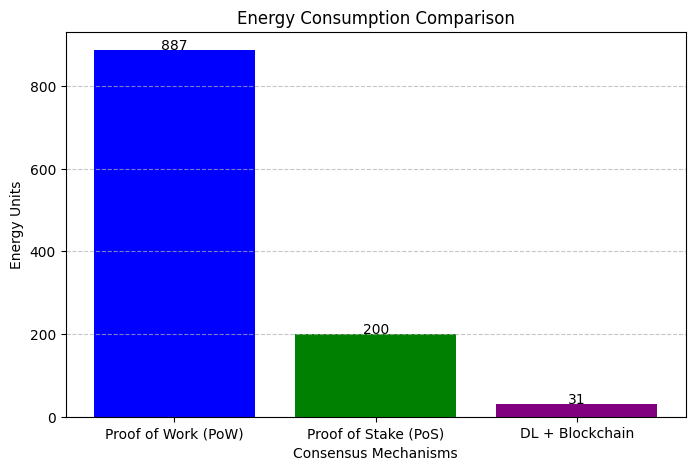

In [28]:
import matplotlib.pyplot as plt

# Energy consumption values from the code
pow_energy_consumption = pow_energy
pos_energy_consumption = pos_energy
dl_blockchain_energy_consumption = energy_tracker.get_consumption()

# Labels and energy values
labels = ['Proof of Work (PoW)', 'Proof of Stake (PoS)', 'DL + Blockchain']
energy_values = [
    pow_energy_consumption,
    pos_energy_consumption,
    dl_blockchain_energy_consumption
]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(labels, energy_values, color=['blue', 'green', 'purple'])
plt.title('Energy Consumption Comparison')
plt.ylabel('Energy Units')
plt.xlabel('Consensus Mechanisms')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on top of bars
for i, value in enumerate(energy_values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=10)

plt.show()
